## Introduction

In [1]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import pandas as pd
import seaborn as sns
import numpy as np
from math import sqrt
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

from sklearn.metrics import plot_roc_curve, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.dummy import DummyClassifier

from datetime import datetime

%matplotlib inline

sns.set_context('talk')

matplotlib_axes_logger.setLevel('ERROR')


Bad key "text.kerning_factor" on line 4 in
/home/quentin/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
/home/quentin/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Jeu de données : histoire de navires

Liste des paramètres à rajouter : 

numériques : puissance propulsive, num_version
catégorielles : genre_navigation, matériau de coque, type de moteur, situation flotteur


In [20]:
df = pd.read_csv('dataset_visites.csv', sep=';', index_col=[0, 1, 2])
df = df.sample(frac=0.1)

df = df[df['year_visit'] >= 2016]

y = df['nombre_prescriptions'].apply(lambda x: 1 if x > 0 else 0)
y_majeur = df['nombre_prescriptions_majeurs'].apply(lambda x: 1 if x > 0 else 0)

display(y.unique())
display(y.describe())

del df['nombre_prescriptions']
del df['nombre_prescriptions_majeurs']
del df['id_gin_visite']


array([1, 0])

count    2132.000000
mean        0.827861
std         0.377590
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: nombre_prescriptions, dtype: float64

In [35]:
df.genre_navigation.isna().sum()

466

In [21]:
df.describe()

,annee_construction,longueur_hors_tout,year_visit,sitrep_history,delai_visites,nombre_prescriptions_hist,nombre_prescriptions_majeurs_hist
count,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,1991.996248,10.524085,2017.542683,3.318480,638.526266,0.772870,0.123684
std,13.366894,4.332515,1.144451,8.139929,420.030030,1.720217,0.282056
min,1901.000000,3.120000,2016.000000,0.000000,27.000000,0.000000,0.000000
25%,1983.000000,7.300000,2017.000000,0.000000,364.000000,0.000000,0.000000
50%,1992.000000,9.495000,2018.000000,0.000000,395.000000,0.000000,0.000000
75%,2003.000000,11.980000,2019.000000,5.000000,802.500000,1.000000,0.142857
max,2017.000000,23.990000,2020.000000,90.000000,1994.000000,27.000000,3.000000


# Est-ce que notre modèle peut apprendre ? TRAIN TRAIN

## Linear SVC

In [13]:
type = 'linear'

svc_prob = SVC(random_state=42, kernel=type, probability=True)
svc = SVC(random_state=42, kernel=type)

svc_prob_majeur = SVC(random_state=42, kernel=type, probability=True)
svc_majeur = SVC(random_state=42, kernel=type)

svc.fit(df, y)
svc_prob.fit(df, y)

svc_majeur.fit(df, y_majeur)

svc_prob_majeur.fit(df, y_majeur)

# y_prob_pred = svc_prob.predict_proba(df)
y_pred = svc.predict(df)

# y_prob_pred_majeur = svc_prob_majeur.predict_proba(df)
y_pred_majeur = svc_majeur.predict(df)

# y_prob_pred = [item[1] for item in y_prob_pred]
# y_prob_pred_majeur = [item[1] for item in y_prob_pred_majeur]

display("Taille du dataset {}".format(len(y_pred_majeur)))
display((y_pred == 1).sum())
display((y_pred_majeur == 1).sum())

print("##########")
print(" Y majeur")
print("##########")

scre = recall_score(y_majeur, y_pred_majeur)
print(f'Recall Score : {scre}')
precision_scre = precision_score(y_majeur, y_pred_majeur)
print(f'Precision Score : {precision_scre}')

print("##########")
print(" Y")
print("##########")

scre = recall_score(y, y_pred)
print(f'Recall Score : {scre}')
precision_scre = precision_score(y, y_pred)
print(f'Precision Score : {precision_scre}')

'Taille du dataset 2105'

2105

213

##########
 Y majeur
##########
Recall Score : 0.1361323155216285
Precision Score : 0.5023474178403756
##########
 Y
##########
Recall Score : 1.0
Precision Score : 0.8218527315914489


## Neural network

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df = sc.fit_transform(df)

clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(150,100,50), random_state=1, activation='relu')
clf_majeur = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(150,100,50), random_state=1, activation='relu')

clf.fit(df, y)
clf_majeur.fit(df, y_majeur)

y_pred = clf.predict(df)
y_pred_majeur = clf_majeur.predict(df)

display("Taille du dataset {}".format(len(y_pred_majeur)))
display((y_pred == 1).sum())
display((y_pred_majeur == 1).sum())

print("##########")
print(" Y majeur")
print("##########")

scre = recall_score(y_majeur, y_pred_majeur)
print(f'Recall Score : {scre}')
precision_scre = precision_score(y_majeur, y_pred_majeur)
print(f'Precision Score : {precision_scre}')

print("##########")
print(" Y")
print("##########")

scre = recall_score(y, y_pred)
print(f'Recall Score : {scre}')
precision_scre = precision_score(y, y_pred)
print(f'Precision Score : {precision_scre}')

/home/quentin/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/quentin/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


'Taille du dataset 2105'

1866

608

##########
 Y majeur
##########
Recall Score : 0.7340966921119593
Precision Score : 0.9490131578947368
##########
 Y
##########
Recall Score : 0.9861271676300578
Precision Score : 0.9142550911039657


## Comparaison avec un Dummy

In [17]:
dumb = DummyClassifier(random_state=42)
dumb_majeur = DummyClassifier(random_state=42)

dumb.fit(df, y)
dumb_majeur.fit(df, y_majeur)

y_pred_dummy = dumb.predict(df)
y_pred_dummy_majeur = dumb_majeur.predict(df)

display(len(y_pred))
display((y_pred_dummy == 1).sum())
display((y_pred_dummy_majeur == 1).sum())


print("")
print("##########")
print(" Y majeur")
print("##########")

scre = recall_score(y_majeur, y_pred_dummy_majeur)
print(f'Recall Score : {scre}')
precision_scre = precision_score(y_majeur, y_pred_dummy_majeur)
print(f'Precision Score : {precision_scre}')

print("")
print("##########")
print(" Y")
print("##########")

scre = recall_score(y, y_pred_dummy)
print(f'Recall Score : {scre}')
precision_scre = precision_score(y, y_pred_dummy)
print(f'Precision Score : {precision_scre}')

/home/quentin/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


21518

17763

8097


##########
 Y majeur
##########
Recall Score : 0.37973438268568616
Precision Score : 0.3813758182042732

##########
 Y
##########
Recall Score : 0.8239230682712856
Precision Score : 0.8248043686314249


# Maintenant test d'apprentissage opérationnel

/home/quentin/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


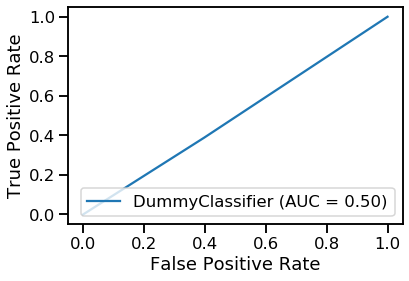

In [15]:
X_train_majeur, X_test_majeur, y_train_majeur, y_test_majeur = train_test_split(df, y_majeur, random_state=42)
dumb = DummyClassifier(random_state=42)
dumb.fit(X_train_majeur, y_train_majeur)

dumb_disp = plot_roc_curve(dumb, X_test_majeur, y_test_majeur)
plt.show()

In [80]:
y_prob_pred_dummy_majeur = dumb.predict_proba(X_test_majeur)
y_pred_dummy_majeur = dumb.predict(X_test_majeur)
y_prob_pred_dummy_majeur = [item[1] for item in y_prob_pred_dummy_majeur]

## Test opérationnel pour le réseau de neurone

In [18]:
df

,,,annee_construction,longueur_hors_tout,year_visit,sitrep_history,delai_visites,nombre_prescriptions_hist,nombre_prescriptions_majeurs_hist
,id_nav_flotteur,date_visite,,,,,,,
53753,1243021.0,2016-07-07 00:00:00+02:00,2002.0,6.92,2016,0,289.0,0.000000,0.000000
47381,1240897.0,2016-09-22 00:00:00+02:00,1995.0,18.62,2016,0,365.0,0.000000,0.000000
11119,1218986.0,2018-06-20 00:00:00+02:00,1981.0,11.30,2018,0,1595.0,0.000000,0.000000
30285,1233163.0,2016-10-14 00:00:00+02:00,1988.0,10.98,2016,0,855.0,0.000000,0.000000
30574,1233276.0,2017-02-27 00:00:00+01:00,1989.0,17.50,2017,0,341.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
43708,1239795.0,2019-12-03 00:00:00+01:00,2001.0,6.90,2019,0,365.0,2.750000,0.250000
25627,1231150.0,2017-06-29 00:00:00+02:00,1987.0,7.80,2017,0,881.0,0.000000,0.000000
49645,1241615.0,2019-07-10 00:00:00+02:00,1999.0,23.40,2019,25,351.0,0.777778,0.111111


In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

cibles = {'y': y, 'y_majeur': y_majeur}
sc = StandardScaler()
df_scaled = sc.fit_transform(df)

y_pred = {}
y_prob_pred = {}
y_test = {}
y_train = {}

for cible in cibles:
    # Pour l'instant, on melange pour extraire le train/test (va t-il deviner le turfu)
    X_train, X_test, y_train[cible], y_test[cible] = train_test_split(df_scaled, cibles[cible], random_state=42)

    clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(150,100,50), random_state=1, activation='relu')

    clf.fit(X_train, y_train[cible])

    y_pred[cible] = clf.predict(X_test)
    y_pred_prob_tmp = clf.predict_proba(X_test)
    y_prob_pred[cible] = [item[1] for item in y_pred_prob_tmp]
    
    print("###################")
    print("Cible   :  {}".format(cible))
    print("Taille du dataset {}".format(len(y_pred[cible])))
    print((y_pred[cible] == 1).sum())

    print(f'Recall Score : {recall_score(y_test[cible], y_pred[cible])}')
    print(f'Precision Score : {precision_score(y_test[cible], y_pred[cible])}')

/home/quentin/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


###################
Cible   :  y
Taille du dataset 527
450
Recall Score : 0.8692660550458715
Precision Score : 0.8422222222222222
###################
Cible   :  y_majeur
Taille du dataset 527
151
Recall Score : 0.37823834196891193
Precision Score : 0.48344370860927155


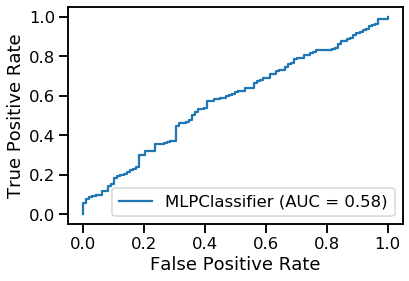

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, random_state=42)
svc_disp = plot_roc_curve(clf, X_test, y_test)
plt.show()

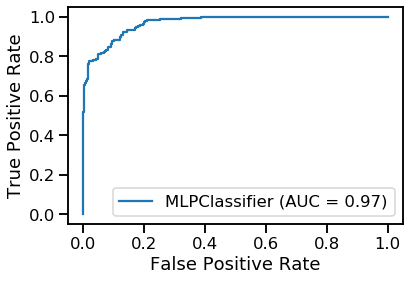

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y_majeur, random_state=42)
svc_disp = plot_roc_curve(clf_majeur, X_test, y_test)
plt.show()

## SVC

In [95]:
from sklearn.svm import SVC, LinearSVC

cibles = {'y': y, 'y_majeur': y_majeur}
y_pred = {}
y_prob_pred = {}
y_test = {}
y_train = {}

type = 'linear'

for cible in cibles:

    X_train, X_test, y_train[cible], y_test[cible] = train_test_split(df, cibles[cible], random_state=42)

    svc_prob = SVC(random_state=42, kernel=type, probability=True)
    svc = SVC(random_state=42, kernel=type)

    svc.fit(X_train, y_train[cible])
    svc_prob.fit(X_train, y_train[cible])

    y_pred[cible] = svc.predict(X_test)
    
    y_pred_prob_tmp = svc_prob.predict_proba(X_test)
    y_prob_pred[cible] = [item[1] for item in y_pred_prob_tmp]
    
    print("###################")
    print("Cible   :  {}".format(cible))
    print("Taille du dataset {}".format(len(y_pred[cible])))
    print((y_pred[cible] == 1).sum())

    print(f'Recall Score : {recall_score(y_test[cible], y_pred[cible])}')
    print(f'Precision Score : {precision_score(y_test[cible], y_pred[cible])}')

###################
Cible   :  y
Taille du dataset 546
546
Recall Score : 1.0
Precision Score : 0.8315018315018315
###################
Cible   :  y_majeur
Taille du dataset 546
82
Recall Score : 0.21844660194174756
Precision Score : 0.5487804878048781


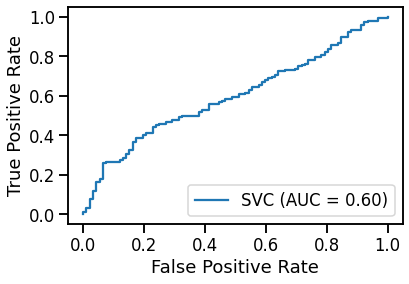

In [90]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, random_state=42)
svc_disp = plot_roc_curve(svc, X_test, y_test)
plt.show()

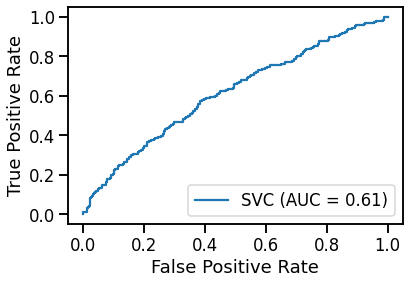

In [91]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y_majeur, random_state=42)
svc_disp = plot_roc_curve(svc_majeur, X_test, y_test)
plt.show()

FAIRE LE DATAFRAME AVEC TOUT LES RESULTATS

In [10]:
df_result = pd.DataFrame(data=X_test)

for cible in cibles:
    print(y_test[cible])
    df_result['prescriptions'] = y_test[cible]

    df_result['prediction_prob'] = np.array(y_prob_pred[cible])
    df_result['prediction'] = np.array(y_pred[cible])

#     df_result['prediction_dummy_prob_majeur'] = np.array(y_prob_pred_dummy_majeur)
#     df_result['prediction_dummy_majeur'] = np.array(y_pred_dummy_majeur)


KeyError: 'y'

In [20]:
def check_visit(row):
    if row['prescriptions'] == 1:
        if row['prediction'] == 1:
            return True
    return False

def check_visit_majeur(row):
    if row['prescriptions_majeur'] == 1:
        if row['prediction_majeur'] == 1:
            return True
    return False

In [25]:
# del df_result['prescriptions']
df_result

,,,annee_construction,longueur_hors_tout,year_visit,sitrep_history,delai_visites,nombre_prescriptions_hist,nombre_prescriptions_majeurs_hist,prescriptions_majeur,prediction_prob_majeur,prediction_dummy_prob_majeur,prediction_majeur
,id_nav_flotteur,date_visite,,,,,,,,,,,
22666,1229814.0,2016-03-01 00:00:00+01:00,1985.0,6.60,2016,5,882.0,0.000000,0.000000,0,0.339649,0.0,0
59685,1245130.0,2018-03-27 00:00:00+02:00,2006.0,13.94,2018,75,356.0,0.833333,0.333333,0,0.779252,1.0,1
56931,1244054.0,2019-02-20 00:00:00+01:00,2005.0,14.25,2019,5,985.0,0.200000,0.200000,0,0.355202,1.0,0
16081,1225757.0,2016-09-21 00:00:00+02:00,1980.0,5.75,2016,0,749.0,0.000000,0.000000,0,0.330412,0.0,0
56972,1244064.0,2016-03-09 00:00:00+01:00,2007.0,11.95,2016,0,748.0,0.000000,0.000000,1,0.335456,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14192,1224431.0,2018-06-28 00:00:00+02:00,1981.0,8.20,2018,5,374.0,0.750000,0.250000,1,0.421793,1.0,0
12936,1222564.0,2017-05-30 00:00:00+02:00,1980.0,8.00,2017,0,1709.0,0.000000,0.000000,0,0.245589,0.0,0
10717,1218713.0,2016-05-09 00:00:00+02:00,1980.0,5.50,2016,0,1062.0,0.000000,0.000000,1,0.294916,0.0,0


In [27]:
df_result['victory'] = df_result.apply(lambda x: check_visit_majeur(x), axis=1)

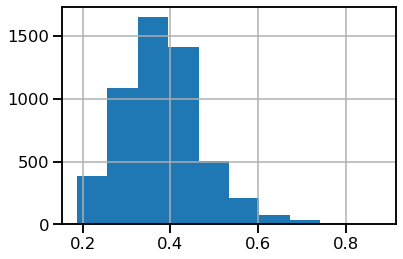

In [32]:
df_result['prediction_prob_majeur'].hist()

## Erreurs du Dummy

In [83]:
display((y_pred_dummy_majeur < 1).sum())
scre = recall_score(y_test_majeur, y_pred_dummy_majeur)
print(f'Recall Score : {score}')

precision_scre = precision_score(y_test_majeur, y_pred_dummy_majeur)
print(f'Precision Score : {precision_scre}')

3341

Recall Score : 0.22669383596535914
Precision Score : 0.35850907307503677


## Erreurs du SVC

In [85]:
display((y_pred_majeur < 1).sum())
scre = recall_score(y_test_majeur, y_pred_majeur)
print(f'Recall Score : {score}')

precision_scre = precision_score(y_test_majeur, y_pred_majeur)
print(f'Precision Score : {precision_scre}')

4573

Recall Score : 0.22669383596535914
Precision Score : 0.5514250309789344


**Checking the proportions of prescriptions at 1**

In [88]:
df_test = df_result.copy()

df_test = df_test.reset_index()

df_test['victory'] = df_test.apply(lambda x: check_visit_majeur(x), axis=1)
df_test['x_index'] = range(0, len(df_test))
df_test = df_test[df_test['year_visit'] == 2019]
df_test.sort_values(by='prediction_prob_majeur', ascending=False)
df_test['victory_graph'] = df_test['prescriptions_majeur'].cumsum()
# df_test['victory_graph'] = df_test['victory'].cumsum()

df_test['prescr_graph'] = df_test['prescriptions_majeur'].cumsum()

df_test_bis = df_test.sort_values(by='prescriptions_majeur', ascending=False)
df_test_bis['prescr_graph'] = df_test_bis['prescriptions_majeur'].cumsum()


display(df_test)
df_test_dummy = df_test.sample(frac=1)  # Sampling the data so no memory of SVC prediction
display(df_test_dummy)

df_test_dummy = df_test_dummy.sort_values(by='prediction_dummy_prob_majeur', ascending=False)
df_test_dummy['dummy_result'] = df_test_dummy['prescriptions_majeur'].cumsum()

nombre_visite_prescr = df_test.prescriptions_majeur.sum()


,level_0,id_nav_flotteur,date_visite,annee_construction,longueur_hors_tout,year_visit,sitrep_history,delai_visites,nombre_prescriptions_hist,nombre_prescriptions_majeurs_hist,prescriptions_majeur,prediction_prob_majeur,prediction_dummy_prob_majeur,prediction_majeur,victory,x_index,victory_graph,prescr_graph
2,56931,1244054.0,2019-02-20 00:00:00+01:00,2005.0,14.25,2019,5,985.0,0.200000,0.200000,0,0.355202,1.0,0,False,2,0,0
5,10245,1218100.0,2019-09-12 00:00:00+02:00,1980.0,7.50,2019,0,1130.0,0.142857,0.000000,0,0.287516,0.0,0,False,5,0,0
19,5289,1205637.0,2019-06-18 00:00:00+02:00,1976.0,12.00,2019,10,368.0,0.166667,0.333333,0,0.480963,0.0,1,False,19,0,0
29,9875,1217603.0,2019-02-19 00:00:00+01:00,1978.0,8.90,2019,5,365.0,0.375000,0.000000,0,0.401491,0.0,0,False,29,0,0
39,21773,1229222.0,2019-06-05 00:00:00+02:00,1984.0,6.30,2019,0,1856.0,0.000000,0.000000,0,0.215634,0.0,0,False,39,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360,62931,1246123.0,2019-12-12 00:00:00+01:00,2007.0,8.40,2019,0,210.0,0.625000,0.250000,1,0.379854,0.0,0,False,5360,452,452
5363,58657,1244774.0,2019-04-05 00:00:00+02:00,2003.0,11.92,2019,0,359.0,3.300000,1.000000,1,0.468432,1.0,1,True,5363,453,453
5366,18675,1227714.0,2019-09-05 00:00:00+02:00,1985.0,9.50,2019,0,365.0,2.111111,0.222222,1,0.396722,0.0,0,False,5366,454,454
5373,59837,1245172.0,2019-05-07 00:00:00+02:00,1997.0,15.24,2019,35,384.0,2.100000,0.900000,1,0.663913,1.0,1,True,5373,455,455


,level_0,id_nav_flotteur,date_visite,annee_construction,longueur_hors_tout,year_visit,sitrep_history,delai_visites,nombre_prescriptions_hist,nombre_prescriptions_majeurs_hist,prescriptions_majeur,prediction_prob_majeur,prediction_dummy_prob_majeur,prediction_majeur,victory,x_index,victory_graph,prescr_graph
3439,2088,850841.0,2019-01-17 00:00:00+01:00,2001.0,5.58,2019,0,913.0,1.000000,0.000000,0,0.278325,1.0,0,False,3439,294,294
3287,31034,1233441.0,2019-12-10 00:00:00+01:00,1991.0,15.99,2019,20,392.0,2.666667,0.833333,1,0.595065,1.0,1,True,3287,287,287
596,36876,1236422.0,2019-01-22 00:00:00+01:00,1992.0,6.33,2019,0,735.0,0.000000,0.000000,0,0.306054,1.0,0,False,596,41,41
3303,7765,1213533.0,2019-10-22 00:00:00+02:00,1968.0,10.62,2019,0,496.0,1.333333,0.333333,1,0.417793,0.0,0,False,3303,289,289
2339,70014,1723145.0,2019-10-24 00:00:00+02:00,2012.0,9.05,2019,0,657.0,0.666667,0.000000,0,0.308783,0.0,0,False,2339,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,4270,1203606.0,2019-09-05 00:00:00+02:00,1971.0,10.60,2019,5,356.0,0.636364,0.363636,0,0.457033,0.0,0,False,1787,151,151
5052,12433,1222020.0,2019-10-29 00:00:00+01:00,1979.0,12.00,2019,10,357.0,1.444444,0.444444,1,0.493043,0.0,1,True,5052,427,427
1675,59058,1244921.0,2019-06-24 00:00:00+02:00,2004.0,10.00,2019,0,369.0,4.000000,0.000000,0,0.362497,0.0,0,False,1675,142,142
815,579,425187.0,2019-07-08 00:00:00+02:00,1982.0,9.00,2019,5,502.0,3.375000,0.500000,1,0.437881,0.0,0,False,815,69,69


**Simulation du graph pour l'année 2019**

In [54]:
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)         # initiate notebook for offline plot

In [91]:
import plotly.graph_objects as go

# Create random data with numpy
import numpy as np


# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_test["x_index"], y=df_test_bis["prescr_graph"],
                    mode='lines',
                    name='Borne sup - Omnipotent', line= {"shape": 'hv'},))

fig.add_trace(go.Scatter(x=df_test["x_index"], y=[len(df_test)]*len(df_test),
                    mode='lines',
                    name='Toutes les visites'))

fig.add_trace(go.Scatter(x=df_test["x_index"], y=df_test["victory_graph"],
                    mode='lines',
                    name='SVC', line= {"shape": 'hv'},))

# fig.add_trace(go.Scatter(x=df_test["x_index"], y=[nombre_visite_prescr]*len(df_test),
#                     mode='lines',
#                     name='Visites impliquant presc majeur'))


fig.add_trace(go.Scatter(x=df_test["x_index"], y=df_test_dummy["dummy_result"],
                    mode='lines',
                    name='Dummy'))

fig.show()

In [ ]:
Mettre les labels des axes
Barre rouge : en vertical
Erreur sur les axes
Axe : % de prescriptions trouvées

In [ ]:
Train train => aleatoire (même distribution ?)
Train train => SVC, il devrait bien prédire

# Deuxieme methode - ROC curve avec kfold

In [10]:
X = df.copy()

0
1


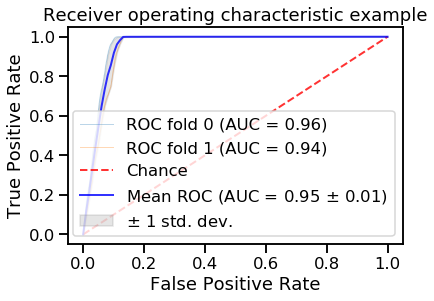

In [11]:

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
random_state = np.random.RandomState(0)

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=2)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    print(i)
    classifier.fit(X.iloc[train], y[train])
    viz = plot_roc_curve(classifier, X.iloc[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

In [68]:
len(y_pred)

13068

Evaluons notre modèle grâce à la métrique **Mean Absolute Error**

Imaginons nous, ISN.  Combien de visites devons nous faire cette année ?



In [ ]:
    #svc_disp = plot_roc_curve(svc, X_test, y_test)
    #plt.show()